The purpose of this notebook is to demonstrate how to refine with locally defined GSAS-II functions.



# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys
sys.path += ['../../../easyXRD']

In [3]:
import easyxrd



Checking required packages:

---pyFAI package with version 2024.5.0 is available and imported 
---xarray package with version 2024.7.0 is available and imported 
---pymatgen package with version 2024.7.18 is available and imported 
---scipy package with version 1.14.0 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---pandas package with version 2.2.2 is available and imported 
---mp_api package with version 0.41.2 is available and imported 
---fabio package with version 2024.4.0 is available and imported 


Imported pysuli with following configuration:



In [4]:
from easyxrd.core import exrd

In [5]:
import xarray as xr
import numpy as np
import pybaselines
from copy import deepcopy

In [6]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

In [7]:
# we use pyFAI for integrations: https://pyfai.readthedocs.io/en/v2023.1/
# It there exists a poni file and mask, we can load them like this:
import pyFAI,fabio

ai_file = 'tiff_files/_calibration.poni'
mask_file = 'tiff_files/_mask.edf'

ai = pyFAI.load(ai_file)
mask = fabio.open(mask_file).data

In [8]:
%%time

sample_Kapton = exrd()
# sample_Kapton.load_xrd_data(from_tiff_file='tiff_files/Kapton.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Kapton.export_ds(save_dir='nc_files',save_name='Kapton.nc')
sample_Kapton.load_xrd_data(from_nc_file='nc_files/Kapton.nc',plot=False)

sample_Air = exrd()
# sample_Air.load_xrd_data(from_tiff_file='tiff_files/Air_scattering.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_Air.export_ds(save_dir='nc_files',save_name='Air.nc')
sample_Air.load_xrd_data(from_nc_file='nc_files/Air.nc',plot=False)

sample_LaB6 = exrd()
# sample_LaB6.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_LaB6.export_ds(save_dir='nc_files',save_name='NIST-LaB6.nc')
sample_LaB6.load_xrd_data(from_nc_file='nc_files/NIST-LaB6.nc',plot=False)

sample_CeO2 = exrd()
# sample_CeO2.load_xrd_data(from_tiff_file='tiff_files/NIST-CeO2.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_CeO2.export_ds(save_dir='nc_files',save_name='NIST-CeO2.nc')
sample_CeO2.load_xrd_data(from_nc_file='nc_files/NIST-CeO2.nc',plot=False)

sample_mix = exrd()
# sample_mix.load_xrd_data(from_tiff_file='tiff_files/NIST-LaB6-CeO2-mix.tiff',
#                             ai = ai,
#                             mask = mask,
#                             radial_range=(0.2,10.2),
#                             plot=True
#                             )
# sample_mix.export_ds(save_dir='nc_files',save_name='NIST-LaB6-CeO2-mix.nc')
sample_mix.load_xrd_data(from_nc_file='nc_files/NIST-LaB6-CeO2-mix.nc',plot=False)



phases_LaB6 = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_CeO2 = [
        {"mp_id":'none', "cif":'_cifs/CeO2_a=5.4113_NIST_value.cif', "label":"CeO2", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

phases_mix = [
        {"mp_id":'none', "cif":'_cifs/LaB6_a=4.1568_NIST_value.cif', "label":"LaB6", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        {"mp_id":'none', "cif":'_cifs/CeO2_a=5.4113_NIST_value.cif', "label":"CeO2", "scale":1, "scale_a":1, "scale_b":1, "scale_c":1},
        ]

CPU times: user 102 ms, sys: 2.99 ms, total: 105 ms
Wall time: 105 ms


GSAS-II binary directory: /home/mt/G2/GSAS-II/GSASII-bin/linux_64_p3.11_n1.26
7 values read from config file /home/mt/G2/GSAS-II/GSASII/config.py

Rwp from 1st refinement is = 5.912 
 
Background is refined. Rwp is now 4.876 (was 5.912)
set_LeBail output:
Rwp is now 5.924 (was 4.876)


'/home/mt/G2/GSAS-II/GSASII'

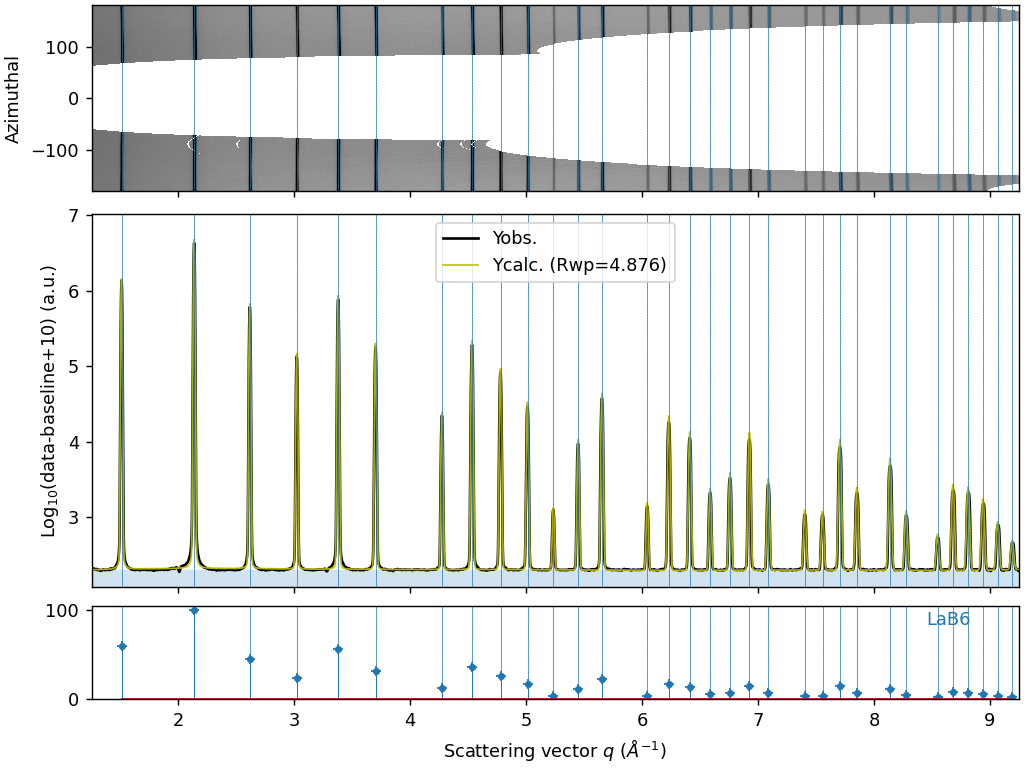

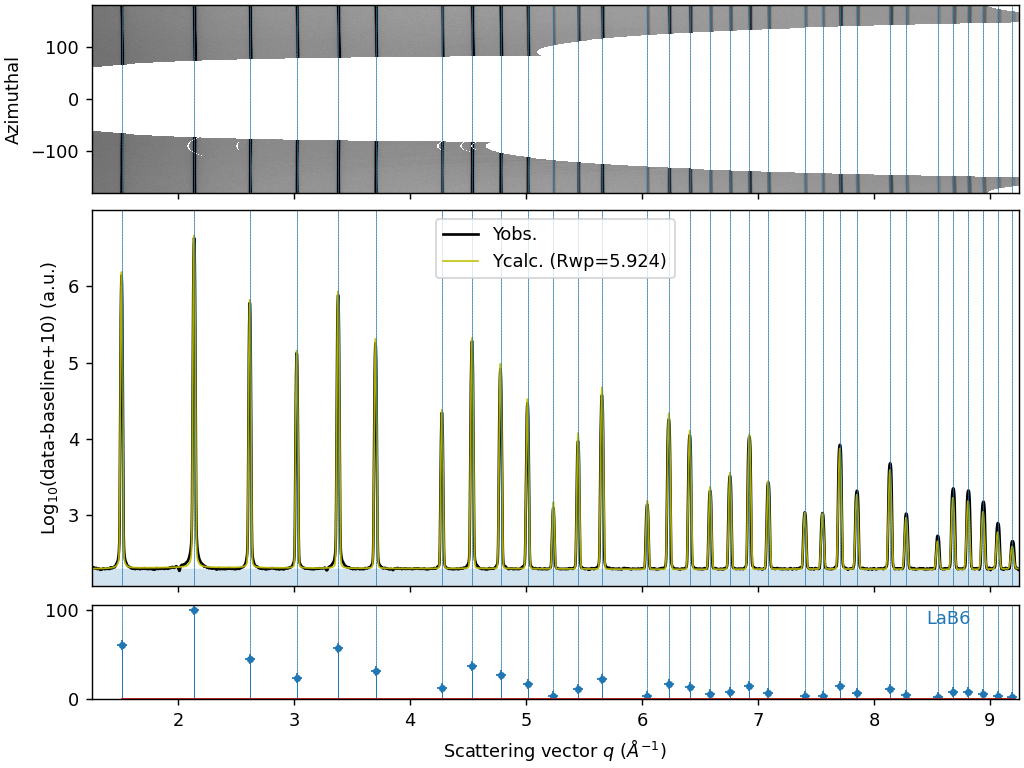

In [9]:
sample = sample_LaB6
sample.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    use_arpls=True,
                    roi_radial_range=[1.25,9.25],
                    plot=False)
sample.load_phases(phases=phases_LaB6,plot=False)


# INITIAL REFINEMENT
sample.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx',gsasii_lib_directory='/home/mt/G2/GSAS-II/GSASII')
sample.set_LeBail()
sample.refine_background(num_coeffs=10)


# /home/mt/G2/GSAS-II/GSASII



sample.plot_refinement()

# SET TO RIETVELD
sample.set_LeBail(set_to=False,refine=True)
sample.plot_refinement()

# # ADD TEXTURE
# sample.gpx['Phases']['LaB6']['Histograms']['PWDR data.xy']['Pref.Ori.'] = ['SH', 1.0, True, [0, 0, 1], 4, {'C(4,1)': 0}, [''], 0.1]
# sample.gpx.refine()
# sample.gpx['Phases']['LaB6']['Histograms']['PWDR data.xy']['Pref.Ori.'][2] = False
# sample.gpx.save()

# sample.plot_refinement()

sample.gsasii_lib_directory


Rwp from 1st refinement is = 11.556 
 
Background is refined. Rwp is now 11.430 (was 11.556)
Size broadening of all phases are refined. Rwp is now 11.225 (was 11.430)
Strain broadening of all phases are refined. Rwp is now 11.308 (was 11.225)


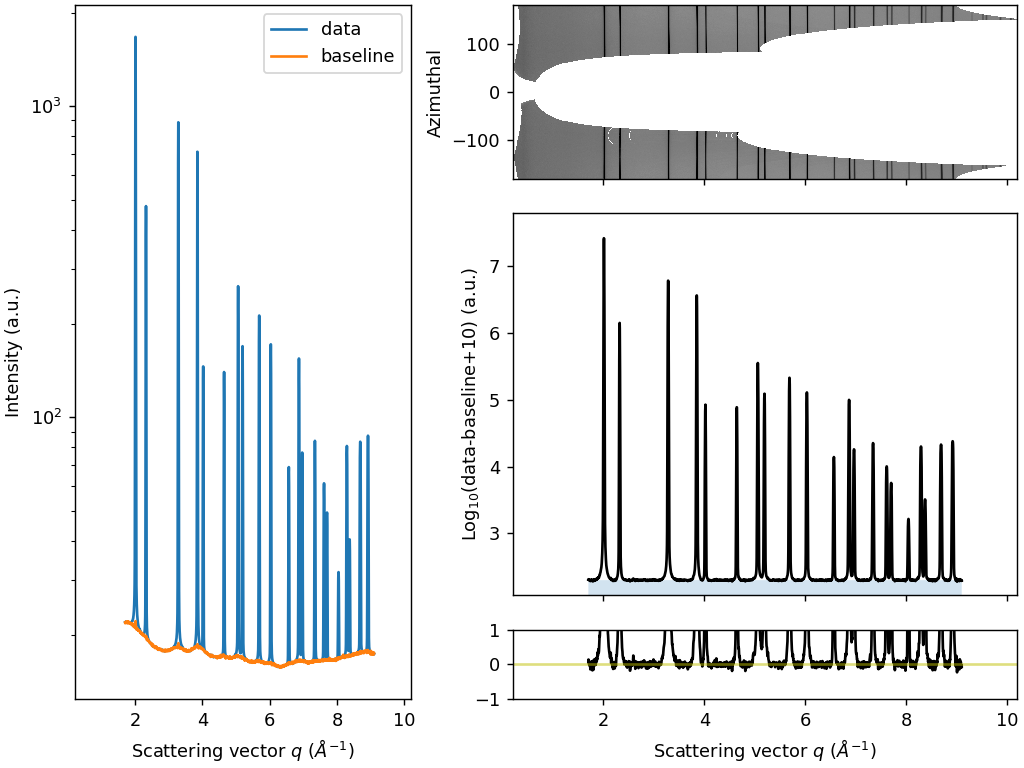

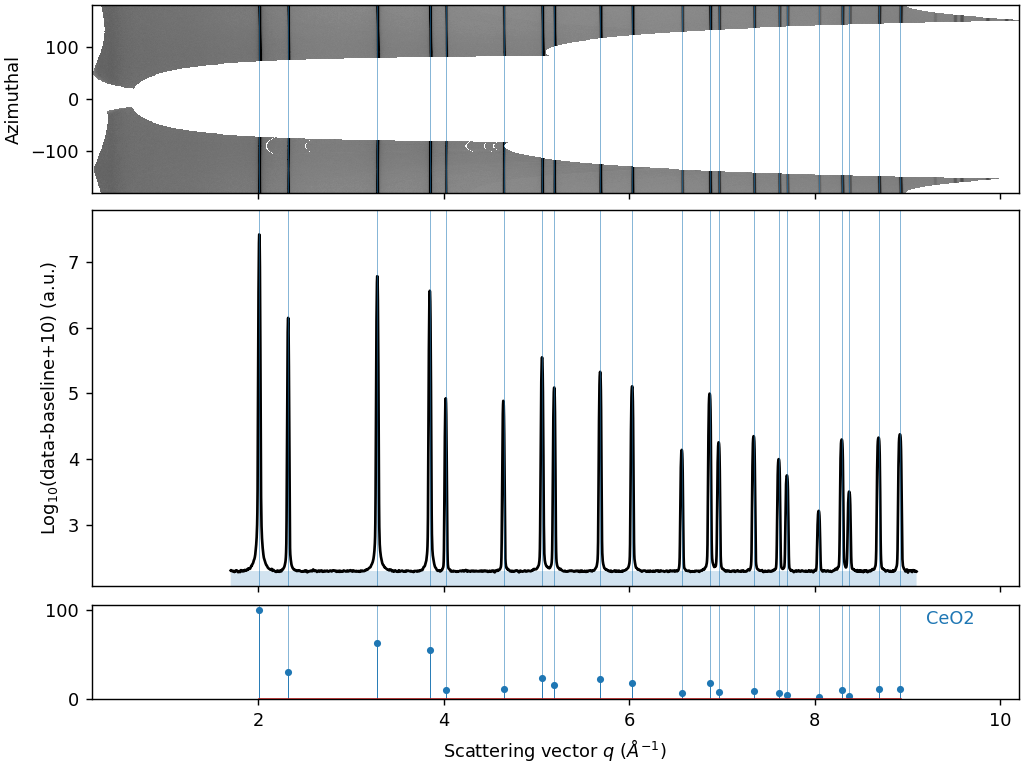

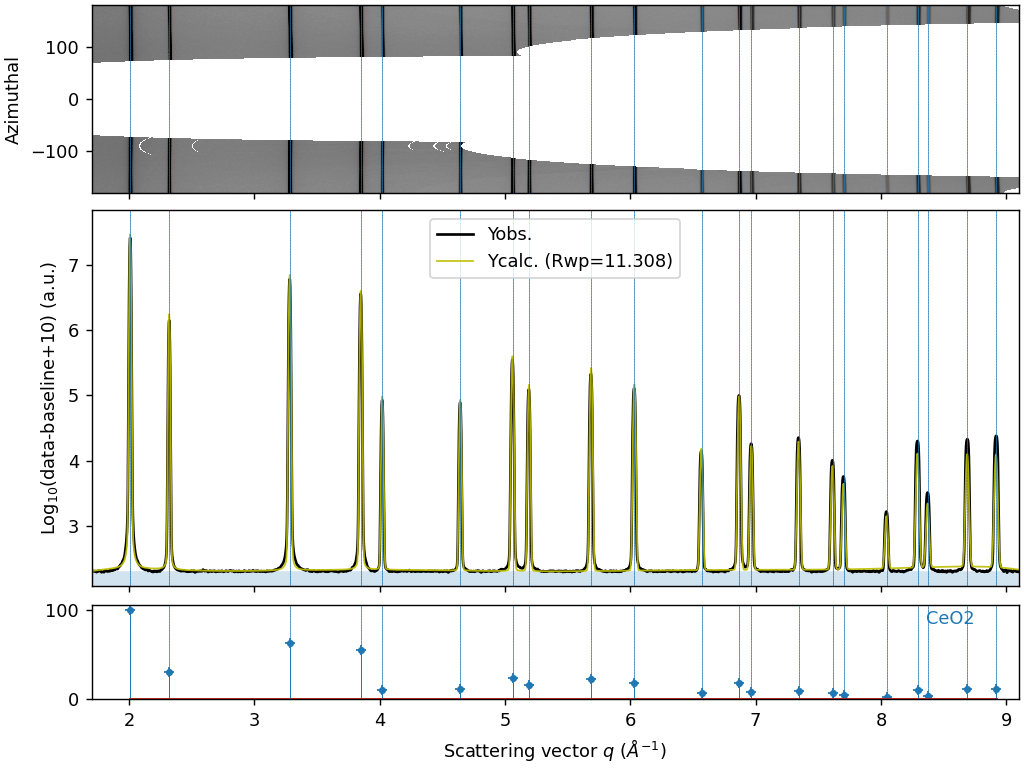

In [10]:
sample_CeO2.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    roi_radial_range=[1.7,9.1],
                    # roi_azimuthal_range=[0,90],
                    plot=True)

sample_CeO2.load_phases(phases=phases_CeO2,plot=True)


sample_CeO2.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx',gsasii_lib_directory='/home/mt/G2/GSAS-II/GSASII')
# sample.set_LeBail()

sample_CeO2.refine_background()
sample_CeO2.refine_size_broadening()
sample_CeO2.refine_strain_broadening()

sample_CeO2.plot_refinement()

In [ ]:
sample.gsasii_lib_directory


Rwp from 1st refinement is = 10.747 
 
Background is refined. Rwp is now 10.681 (was 10.747)
Size broadening of all phases are refined. Rwp is now 10.438 (was 10.681)
Strain broadening of all phases are refined. Rwp is now 10.471 (was 10.438)


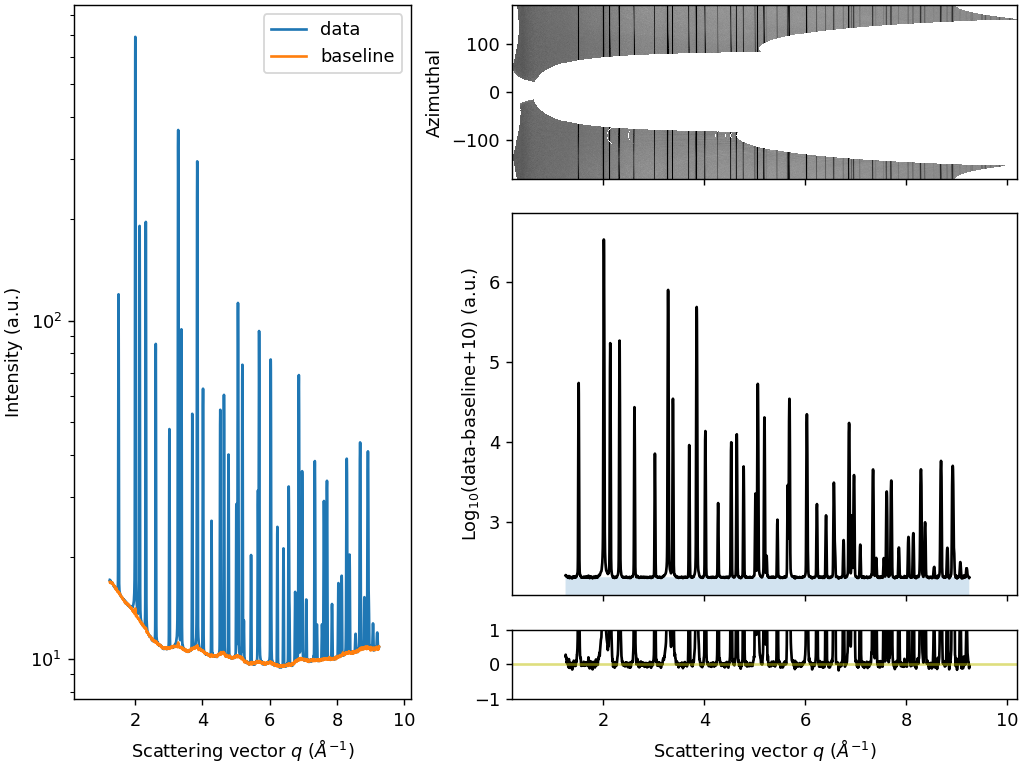

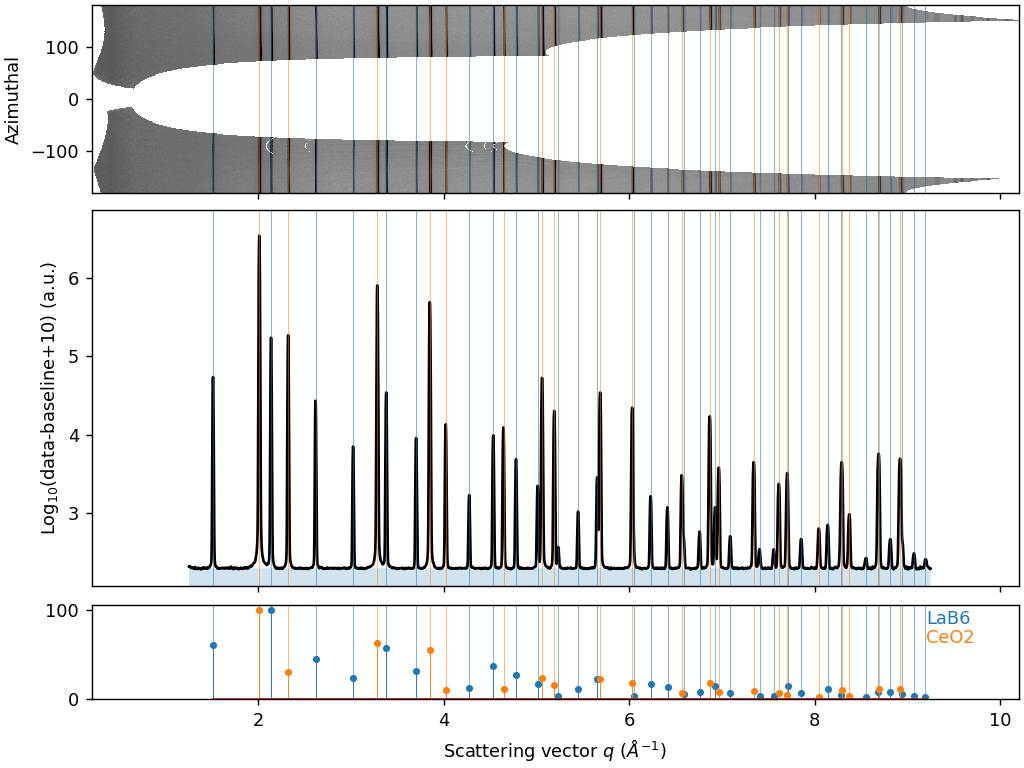

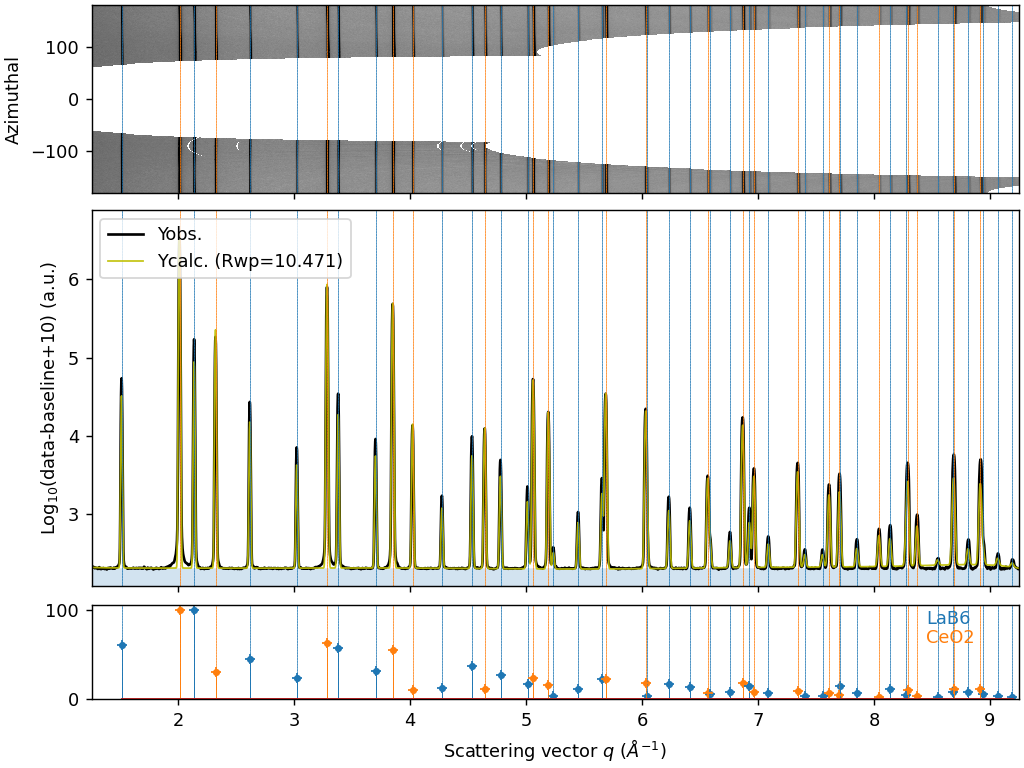

In [12]:
sample_mix.get_baseline(i1d_bkg=sample_Kapton.ds.i1d,
                    arpls_lam=1e5,
                    roi_radial_range=[1.25,9.25],
                    # roi_azimuthal_range=[0,90],
                    plot=True)

sample_mix.load_phases(phases=phases_mix,plot=True)


sample_mix.setup_gsas2_calculator(instprm_from_gpx='gsas_LaB6.gpx',gsasii_lib_directory='/home/mt/G2/GSAS-II/GSASII')

sample_mix.refine_background()
sample_mix.refine_size_broadening()
sample_mix.refine_strain_broadening()

sample_mix.plot_refinement()

In [14]:
sample_mix.fine_tune_gpx()


EnvironmentLocationNotFound: Not a conda environment: /home/mt/.gsasii_scratch/10.00_test.gsastmp/gsas.gpx


(GSASII.py:47769): dbind-WARNING **: 23:19:20.895: Couldn't connect to accessibility bus: Failed to connect to socket /home/mt/.cache/at-spi/bus_1: Permission denied


GSAS-II binary directory: /home/mt/G2/GSAS-II/GSASII-bin/linux_64_p3.11_n1.26
7 values read from config file /home/mt/G2/GSAS-II/GSASII/config.py
Python/module versions loaded:
  Python:     3.11.9  from /home/mt/software/miniforge3/bin/python3.11. 
  wx:         4.2.1  
  matplotlib: 3.9.1  
  numpy:      1.26.4  
  scipy:      1.14.0  
  OpenGL:     3.1.6  
  Image:      10.4.0 (PIL or Pillow)
  Platform:   linux 64bit x86_64
  GSAS-II:    afdb99, 31-Jul-2024 11:53 (19.5 days old). Last tag: #5792
	**** Please consider updating. >= 39 updates have been posted
Note: 2 importer(s) could not be installed. See the
  "Import->Show importer error(s)" menu command for more information
loading from file: gsas.gpx
GPX load successful. Last saved with GSAS-II revision 5792
wrote file /home/mt/G2/GSAS-II/GSASII/config.py
save to file: gsas.gpx
project save successful
 Hessian Levenberg-Marquardt SVD refinement on 2 variables:
initial chi^2 577.54 with 3200 obs.
Cycle 0: 1.66s, Chi**2: 358.48 fo

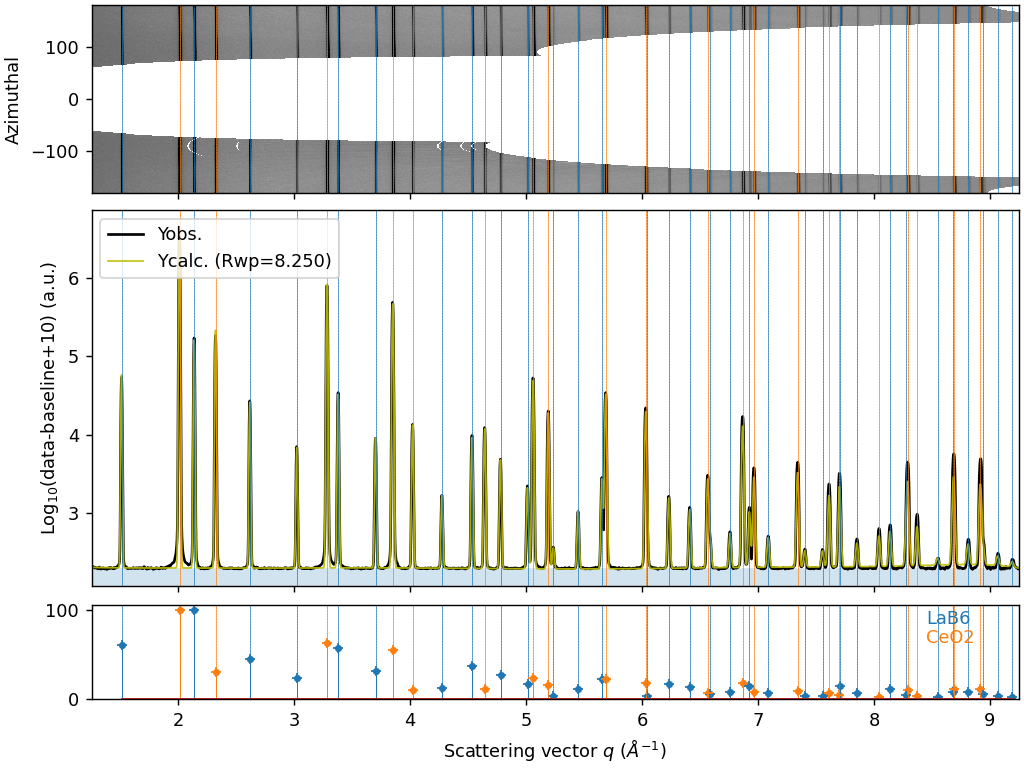

In [15]:
sample_mix.plot_refinement()